# Research on the Factors Affecting the Macroeconomics of the Stock Price index

Student: ZHU Huilei

## Introductions

Based on the second-hand data collected on the Kaggle website, this article absorbs and draws on effective empirical research to analyze the macroeconomic factors that affect stock prices in various countries,carrying out regression analysis on macroeconomic factors, establish a multiple linear regression model, and conduct correlation analysis on multiple factors at the same time, and propose factors with small relative influence, and then use ols,random forest model to find significant factors.
Studying the impact of macroeconomic variables on stock index prices can inform investment decisions, provide market analysis, assist in economic forecasting, improve risk management, and have important policy implications.

## Motivations

The reasons why i studying the impact of macroeconomic variables on the movement of stock index prices:

Better investment decisions: Understanding the relationship between macroeconomic indicators and stock prices can help investors make informed decisions about buying, holding, or selling stocks.

Market analysis: Analyzing the impact of macroeconomic indicators on stock prices can provide valuable insights into market trends and help traders identify potential opportunities for profit.

Economic forecasting: Studying the relationship between macroeconomic indicators and stock prices can provide valuable information for forecasting future economic conditions.

Risk management: By understanding the impact of macroeconomic indicators on stock prices, investors can better assess and manage risk in their portfolios.

Policy implications: The relationship between macroeconomic indicators and stock prices can have important implications for economic policy, as changes in macroeconomic variables can have a significant impact on stock prices and the economy as a whole.

## Data description

The dataset contains data for 8 countries and one special administrative region (China, France, Germany, Hong Kong, India, Japan, Spain, United Kingdom and United States of America) from 1980 through 2020. It include major macroeconomic factors like inflation, unemployment, GDP, exchange rate (base USD) and per capita income. Apart from that it has the stock prices of the respective country's major stock index which can help in analysing the data set to identify the impact of major macroeconomic variables on the movement of stock index prices.

The details of variables :
1. stock index: Name of Country's Major Stock Index;
2. country: Name of Country ,8 countries and one special administrative region (China, France, Germany, Hong Kong, India, Japan, Spain, United Kingdom and United States of America);
3. year: Year from 1980 through 2020;
4. index price: Average Index Price of the Year;
5. log_indexprice: Logarithmic value of the index price so as to neglect the error caused by currency differences;
6. inflationrate：Inflation of respective countries from 1980-2020;
7. oil prices：Oil Prices in USD 1980 - 2020;
8. exchange_rate：Exchange rate of country's currency to USD 1980 - 2020;
9. gdppercent：The change of percent GDP of respective countries from 1980-2020;
10. percapitaincome：Per capita Income of respective countries from 1980-2020;
11. unemploymentrate: The unemployment rate represents the number of unemployed as a percentage of the labor force;
12. manufacturingoutput: This is measured in an index based on a reference period that expresses change in the volume of production output;
13. tradebalance: Balance of trade (BOT) is the difference between the value of a country's exports and the value of a country's imports for a given period. Balance of trade is the largest component of a country's balance of payments (BOP);
14. USTreasury: United States Treasury securities.


# 1. Preprocessing


## 1.1 Import package and read data

In [203]:
# Import package
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# Import the visualizer class
import pydotplus
from IPython.display import display, Image

In [39]:
# read data ,
stock_df = pd.read_csv('Economic Data - 9 Countries (1980-2020).csv' , encoding='gbk')
stock_df.head()


,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12


In [40]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


In [41]:

stock_df.head()

,stock index,country,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
0,NASDAQ,United States of America,1980.0,168.61,2.23,0.14,21.59,1.0,0.09,12575.0,0.07,NaN,-13.06,0.11
1,NASDAQ,United States of America,1981.0,203.15,2.31,0.10,31.77,1.0,0.12,13976.0,0.08,NaN,-12.52,0.14
2,NASDAQ,United States of America,1982.0,188.98,2.28,0.06,28.52,1.0,0.04,14434.0,0.10,NaN,-19.97,0.13
3,NASDAQ,United States of America,1983.0,285.43,2.46,0.03,26.19,1.0,0.09,15544.0,0.10,NaN,-51.64,0.11
4,NASDAQ,United States of America,1984.0,248.89,2.40,0.04,25.88,1.0,0.11,17121.0,0.08,NaN,-102.73,0.12


## 1.2 Check   missing values

In [42]:
stock_df.isnull().sum()

stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64

As we can see ,'indexprice','inflationrate','gdppercent','unempoymentrate','manufacturingoutput','tradebalance'have missing values,so replacing the Missing Values by mean in the columns

In [43]:
# Replacing index prices with mean values
stock_df['index price'] = stock_df['index price'].fillna(stock_df['index price'].mean())

# Replacing inflation rates with mean values
stock_df['inflationrate'] = stock_df['inflationrate'].fillna(stock_df['inflationrate'].mean())

# Replacing excahnge rates with mean values
stock_df['exchange_rate'] = stock_df['exchange_rate'].fillna(stock_df['exchange_rate'].mean())

# Replacing GDP with mean values
stock_df['gdppercent'] = stock_df['gdppercent'].fillna(stock_df['gdppercent'].mean())

# Replacing per capita income with mean values
stock_df['percapitaincome'] = stock_df['percapitaincome'].fillna(stock_df['percapitaincome'].mean())

# Replacing unemployment rate with mean values
stock_df['unemploymentrate'] = stock_df['unemploymentrate'].fillna(stock_df['unemploymentrate'].mean())

# Replacing manifacturing output with mean values
stock_df['manufacturingoutput'] = stock_df['manufacturingoutput'].fillna(stock_df['manufacturingoutput'].mean())

# Replacing trade balance with mean values
stock_df['tradebalance'] = stock_df['tradebalance'].fillna(stock_df['tradebalance'].mean())

In [44]:
# Checking if all values are filled
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          369 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        369 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        369 non-null    float64
 8   gdppercent           369 non-null    float64
 9   percapitaincome      369 non-null    float64
 10  unemploymentrate     369 non-null    float64
 11  manufacturingoutput  369 non-null    float64
 12  tradebalance         369 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


## 1.3 Descriptive statistics

In [45]:
stock_df.describe()

,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,2000.000000,7898.648297,3.610542,0.041748,39.743171,27.897548,0.037114,20719.964674,0.068908,328.084820,-15.996384,0.059024
std,11.848225,7238.440336,0.482481,0.037195,25.452654,49.485499,0.036860,17411.332758,0.041956,539.986266,153.714891,0.033086
min,1980.000000,168.610000,2.230000,-0.040000,11.350000,0.900000,-0.110000,27.000000,0.020000,0.590000,-770.930000,0.010000
25%,1990.000000,2846.500000,3.320000,0.020000,19.410000,1.330000,0.020000,2099.000000,0.040000,101.070000,-24.120000,0.030000
50%,2000.000000,6456.910000,3.600000,0.030000,28.520000,5.520000,0.030000,20039.000000,0.060000,245.730000,-0.140000,0.050000
75%,2010.000000,9484.470000,3.980000,0.050000,57.880000,17.490000,0.050000,36354.000000,0.080000,328.084820,18.150000,0.080000
max,2020.000000,47751.330000,4.680000,0.240000,98.560000,249.050000,0.150000,65280.000000,0.260000,3868.460000,366.140000,0.140000


In [48]:
# set ‘year’ into index
data_st = stock_df.set_index('year')
data_st.drop(['stock index','country'],axis=1,inplace=True)

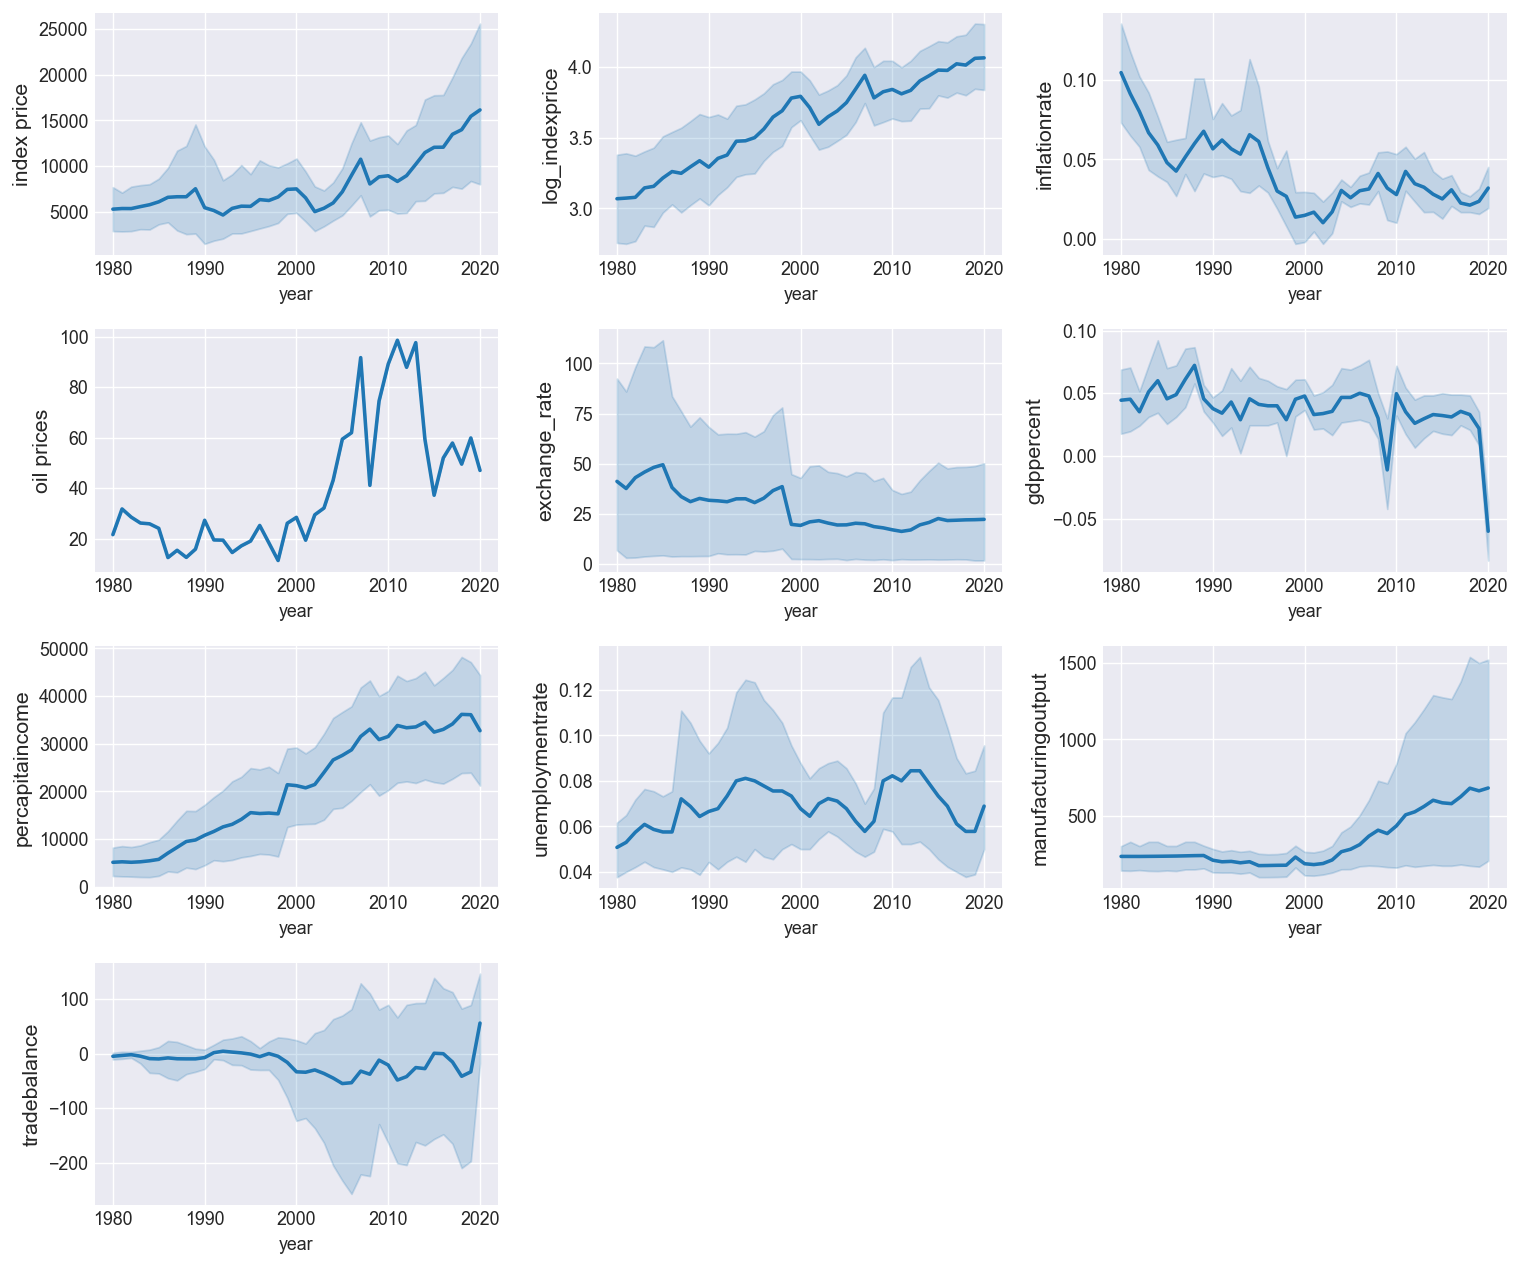

In [55]:
# Sequence diagram of eight variables
column = data_st.columns.tolist() 
matplotlib.style.use('seaborn-dark')
fig = plt.figure(figsize=(12,10), dpi=128) 
for i in range(10):
    plt.subplot(4,3, i + 1)  
    sns.lineplot(data=data_st[column[i]],lw=2)  
    plt.grid()
    plt.ylabel(column[i], fontsize=12)
plt.tight_layout()
plt.show()


It can be seen that all variables are monotonically increasing and have a consistent trend

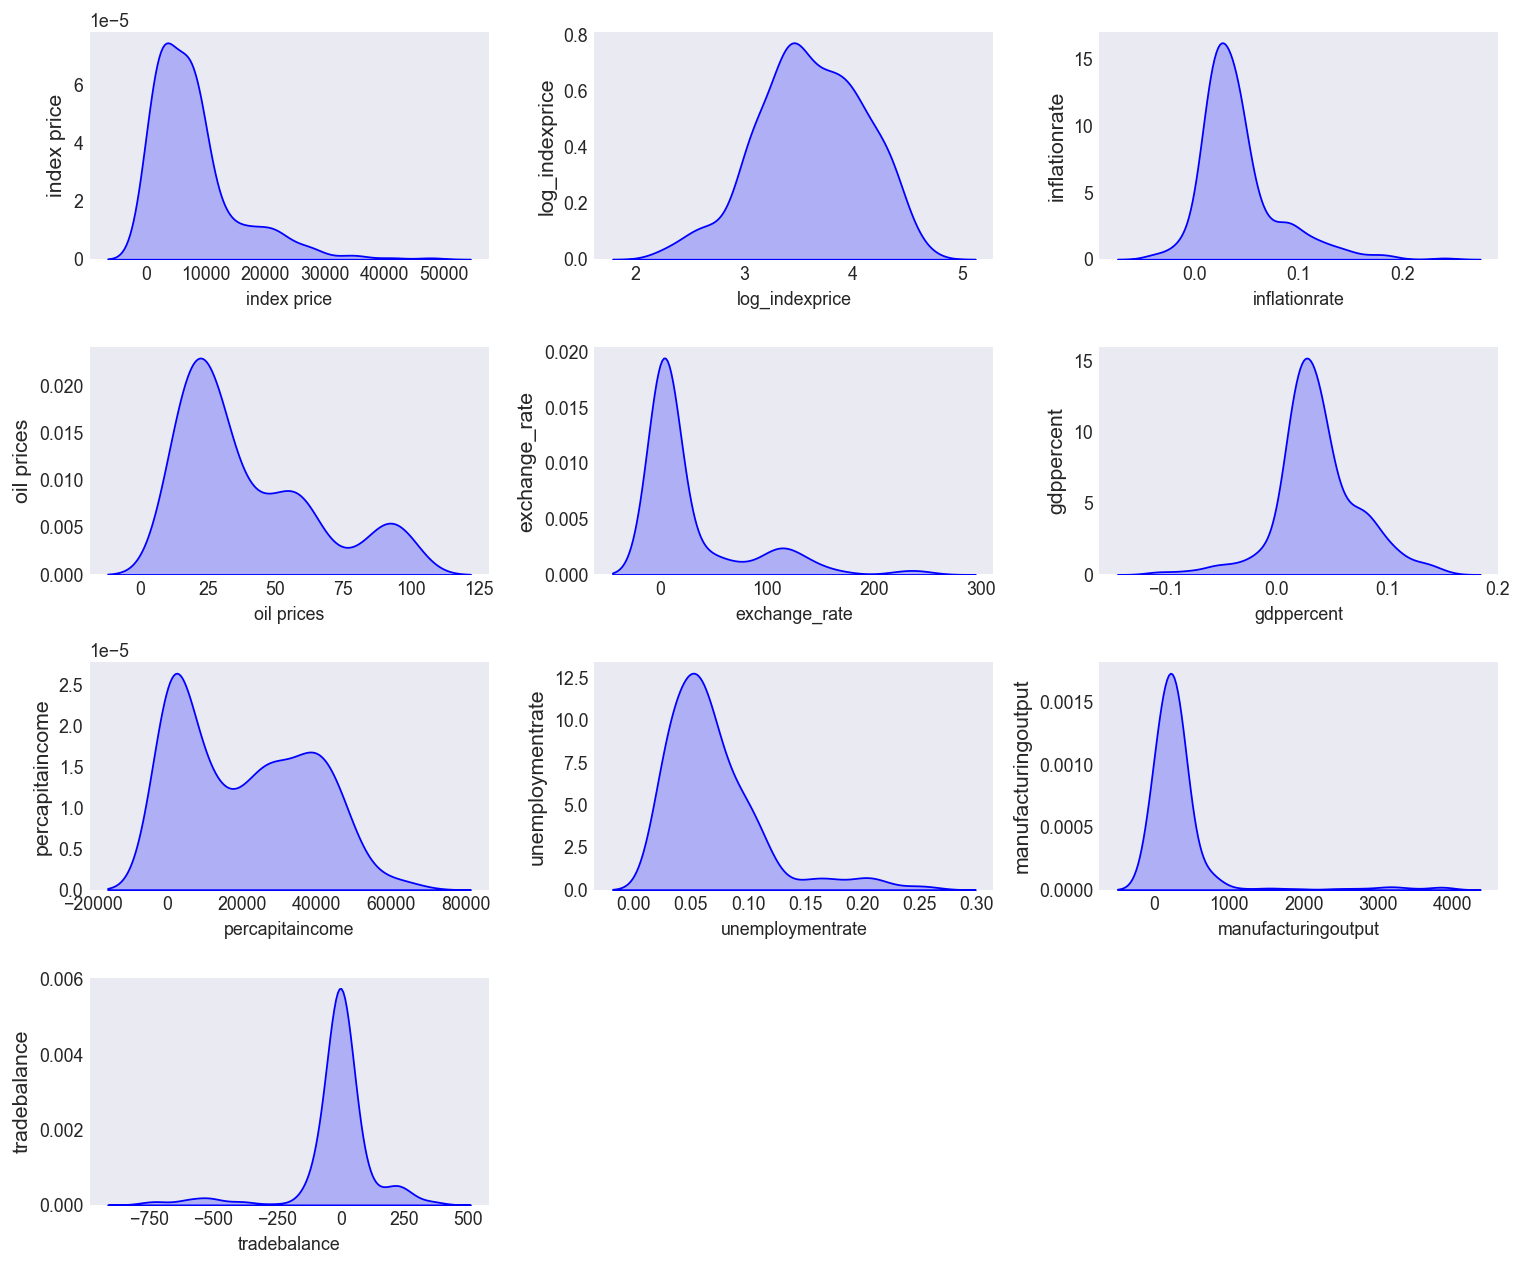

In [50]:
# Draw kernel density map of all variables
column = data_st.columns.tolist() 
fig = plt.figure(figsize=(12,10), dpi=128) 
for i in range(10):
    plt.subplot(4,3, i + 1)  
    sns.kdeplot(data=data_st[column[i]], color='blue',shade= True)  
    plt.ylabel(column[i], fontsize=12)
plt.tight_layout()
plt.show()

It can be seen that the data distribution is relatively concentrated, and there is no abnormal point

# 2. Analyze correlations 

## 2.1 Heatmap analysis

<AxesSubplot:>

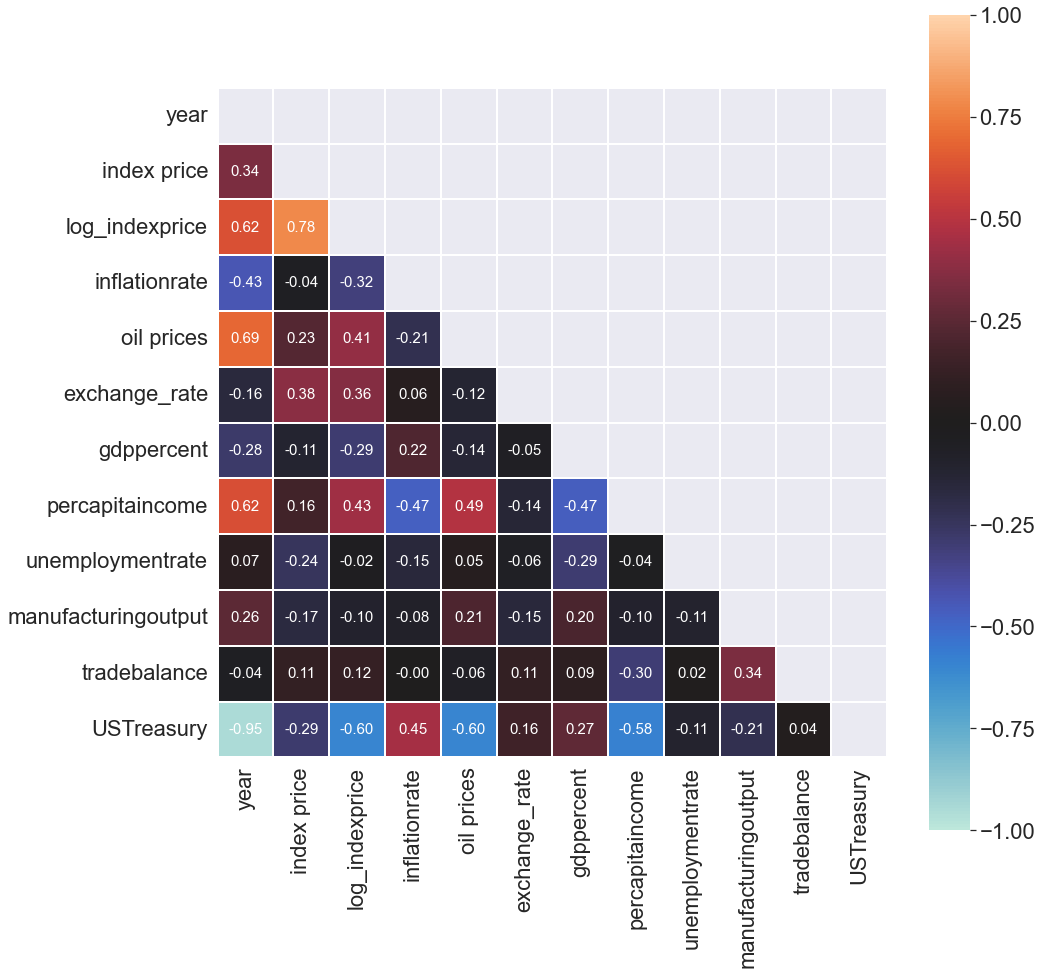

In [140]:
data_matrix = stock_df.drop(['stock index','country'],axis=1)
plt.figure(figsize = (15,15))
sns.heatmap(data_matrix.corr(), center=0,vmax=1.0, vmin=-1.0, cbar=True,square=True, annot=True,fmt=".2f", annot_kws={"size": 15, "color": "white"}, 
            linewidths=0.1, mask=np.triu(data_matrix.corr()))

There is a high correlation between many Xs, and the classic OLS model may have serious multicollinearity.

In [70]:
# Find the correlation coefficient between all variables
data_matrix.corr('pearson')


,year,index price,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,unemploymentrate,manufacturingoutput,tradebalance,USTreasury
year,1.000000,0.340627,0.618927,-0.430645,0.693460,-0.157502,-0.279498,0.615610,0.072662,0.255315,-0.040601,-0.948907
index price,0.340627,1.000000,0.781482,-0.043507,0.228574,0.375232,-0.110155,0.164625,-0.243323,-0.168482,0.112074,-0.286260
log_indexprice,0.618927,0.781482,1.000000,-0.317428,0.405666,0.363097,-0.293933,0.431553,-0.024604,-0.097482,0.119281,-0.598548
inflationrate,-0.430645,-0.043507,-0.317428,1.000000,-0.211666,0.058471,0.216853,-0.474496,-0.152439,-0.079829,-0.003792,0.449875
oil prices,0.693460,0.228574,0.405666,-0.211666,1.000000,-0.124208,-0.137675,0.485025,0.054627,0.210758,-0.062801,-0.596523
exchange_rate,-0.157502,0.375232,0.363097,0.058471,-0.124208,1.000000,-0.049194,-0.140327,-0.061281,-0.152625,0.109446,0.159527
gdppercent,-0.279498,-0.110155,-0.293933,0.216853,-0.137675,-0.049194,1.000000,-0.467262,-0.290742,0.196909,0.089828,0.265620
percapitaincome,0.615610,0.164625,0.431553,-0.474496,0.485025,-0.140327,-0.467262,1.000000,-0.038433,-0.098185,-0.303615,-0.578800
unemploymentrate,0.072662,-0.243323,-0.024604,-0.152439,0.054627,-0.061281,-0.290742,-0.038433,1.000000,-0.105526,0.023104,-0.108352
manufacturingoutput,0.255315,-0.168482,-0.097482,-0.079829,0.210758,-0.152625,0.196909,-0.098185,-0.105526,1.000000,0.339657,-0.211691


## 2.2 Scatter plot fit line analysis - Pearson

In [77]:
# Calculate the correlation coefficient of price index with other variables
corr = data_matrix.corr()['log_indexprice'].drop(['log_indexprice'])
corr = corr.drop(['index price'])
corr.sort_values(ascending=False)

year                   0.618927
percapitaincome        0.431553
oil prices             0.405666
exchange_rate          0.363097
tradebalance           0.119281
unemploymentrate      -0.024604
manufacturingoutput   -0.097482
gdppercent            -0.293933
inflationrate         -0.317428
USTreasury            -0.598548
Name: log_indexprice, dtype: float64

The correlation coefficient and degree of correlation are generally divided into:
<br/>1. 0.8-1.0 very strong correlation
<br/>2. 0.6-0.8 strong correlation
<br/>3. 0.4-0.6 moderate correlation
<br/>4. 0.2-0.4 weak correlation
<br/>5. 0.0-0.2 very weak correlation

According to the correlation coefficient, the relationship between the price index and other variables has different strenth of correlation.



 Strongly correlated features:  ['year'] 



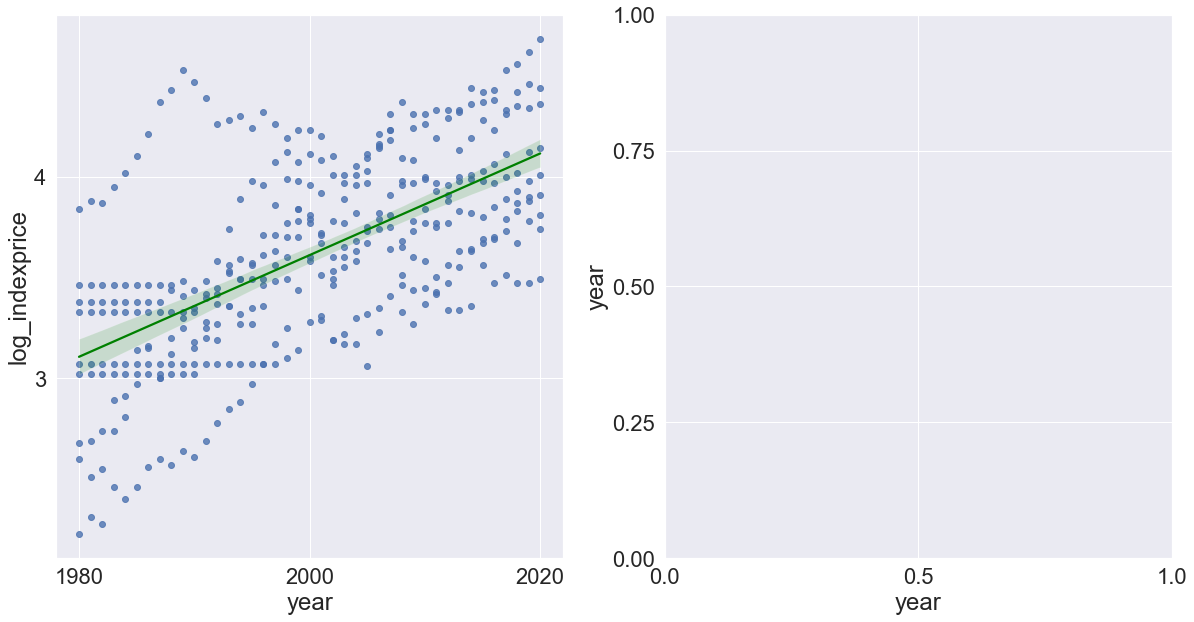

In [125]:
# Identifying the strong correlated features (corr > 0.6)
strong_corr = corr[abs(corr) >= 0.6].sort_values(ascending=False).index.tolist()
print('\n Strongly correlated features: ', strong_corr, '\n')

# Strong features
strong_fet = data_matrix.loc[:, strong_corr + ['log_indexprice']]

# Plot of strong feature's regression
fig, ax = plt.subplots(1, 2, figsize = (20,10))

for i, ax in enumerate(ax):
    if i < len(strong_corr):
        sns.regplot(x=strong_corr[i], y='log_indexprice', data=strong_fet, ax=ax, line_kws={'color': 'green'})
        sns.set(font_scale=6)
        plt.ylabel(strong_corr[i], fontsize=24)
        plt.xlabel(strong_corr[i], fontsize=24)


plt.show()        
        


 Moderate correlation features:  ['percapitaincome', 'oil prices', 'USTreasury'] 



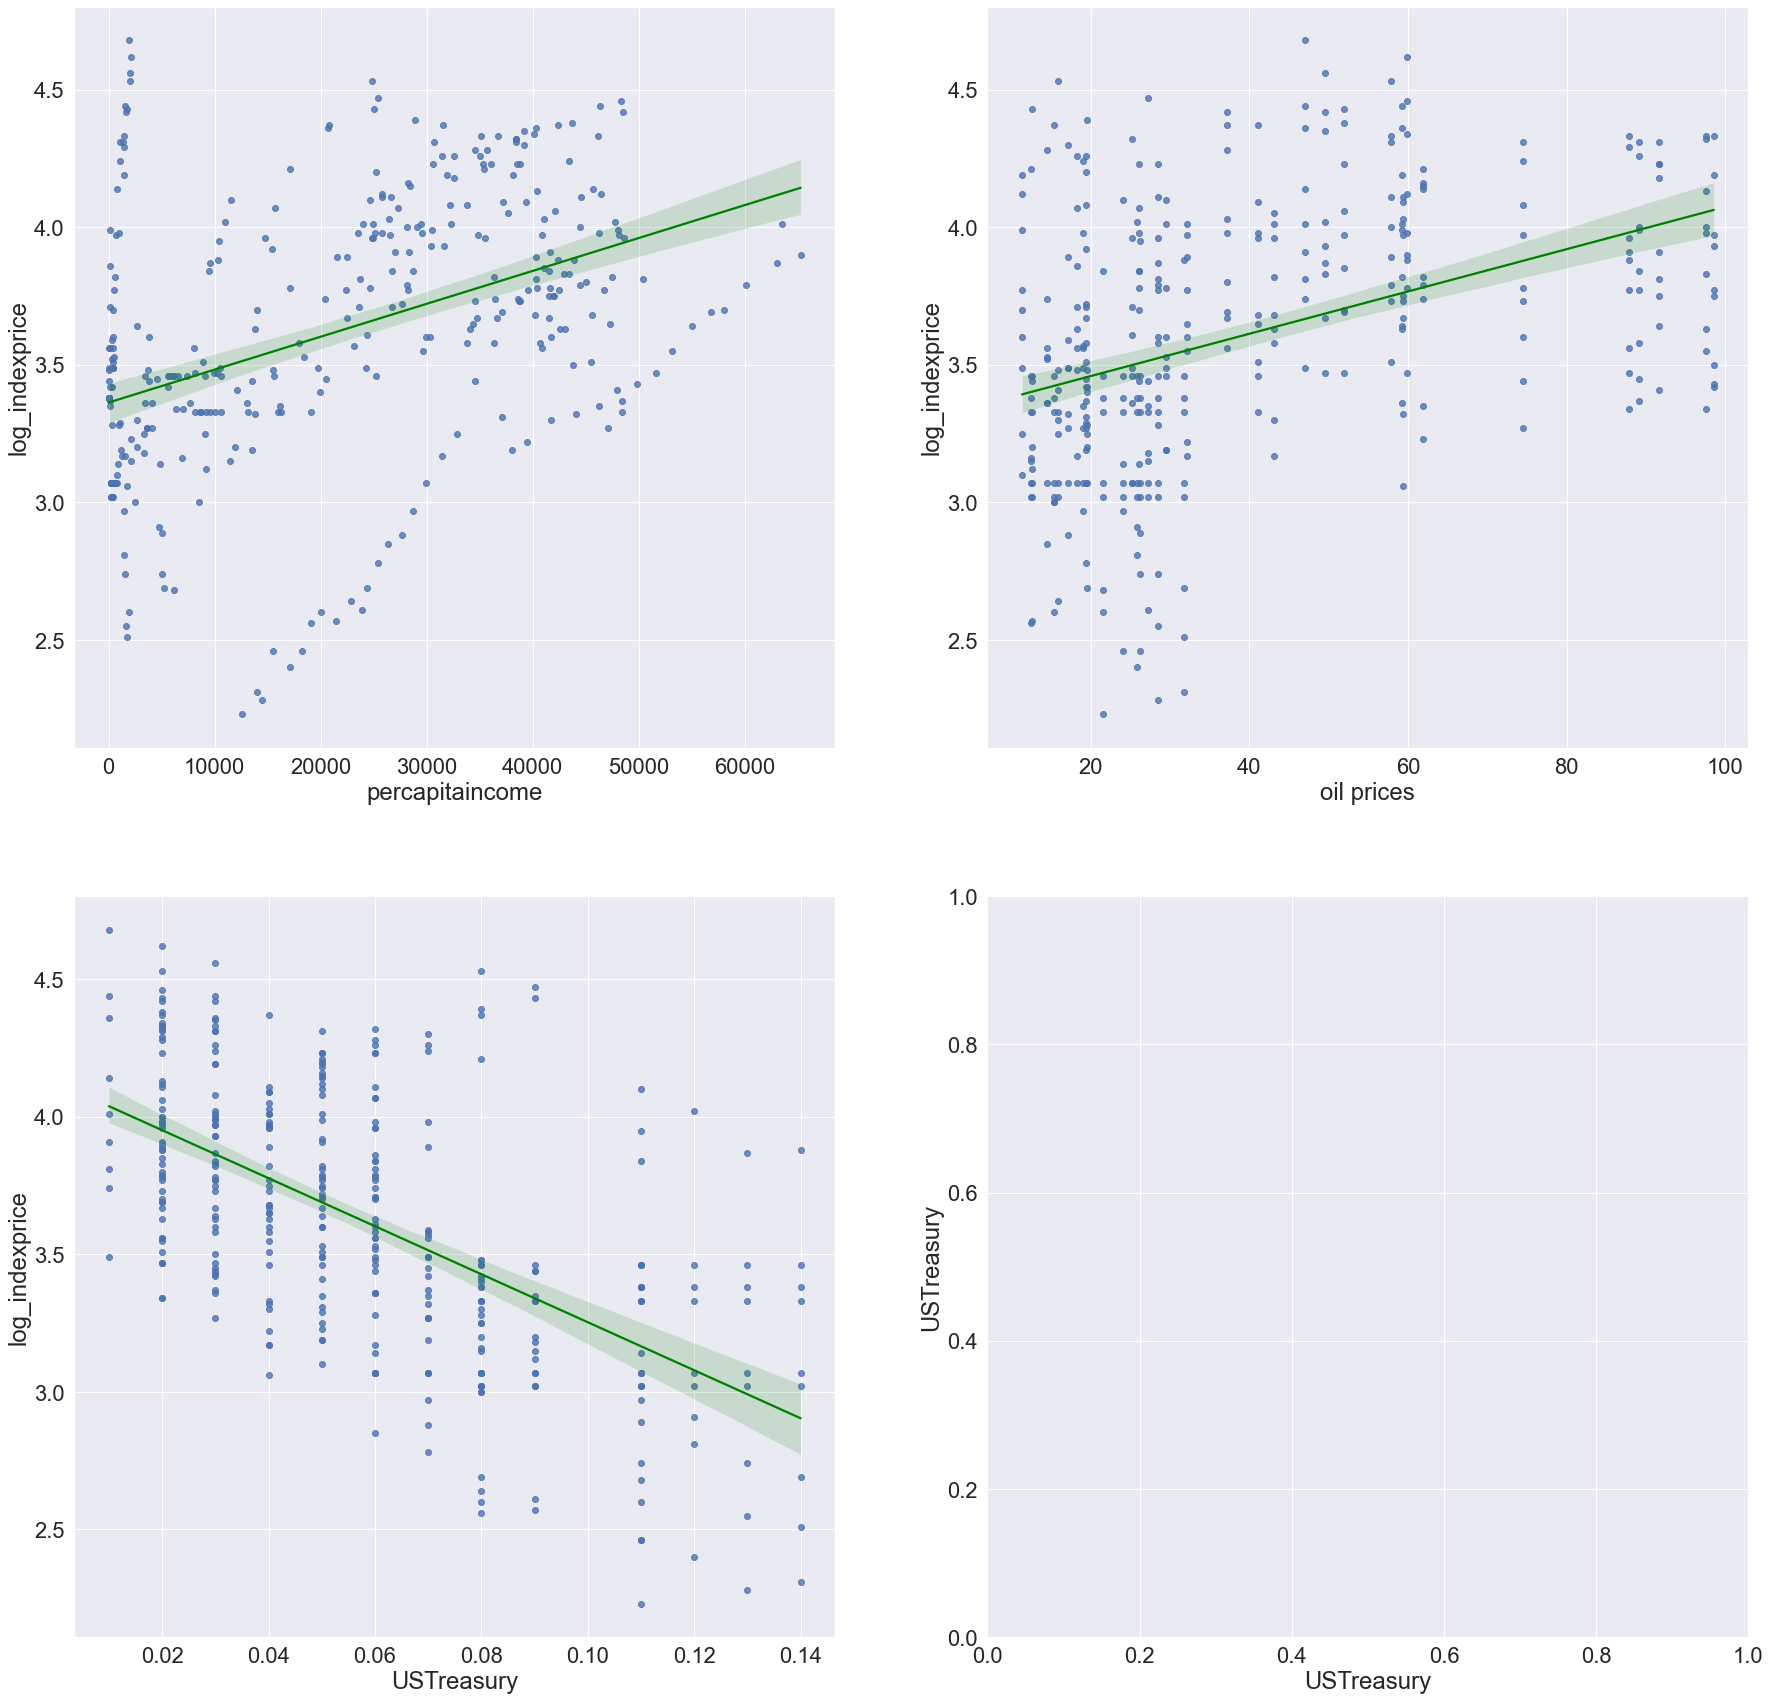

In [141]:
# moderate correlation features ( > 0.4 & < 0.6)
moderate_corr = corr[(abs(corr) >= 0.4) & (abs(corr) < 0.6)].sort_values(ascending=False).index.tolist()
print('\n Moderate correlation features: ', moderate_corr, '\n')

moderate_fet = data_matrix.loc[:, moderate_corr + ['log_indexprice']]

fig, ax = plt.subplots(2, 2, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(moderate_corr):
        sns.regplot(x=moderate_corr[i], y='log_indexprice', data=moderate_fet, ax=ax, line_kws={'color': 'green'})
        sns.set(font_scale=2)
        plt.ylabel(moderate_corr[i], fontsize=24)
        plt.xlabel(moderate_corr[i], fontsize=24)



 Weakly correlated features:  ['exchange_rate', 'gdppercent', 'inflationrate'] 



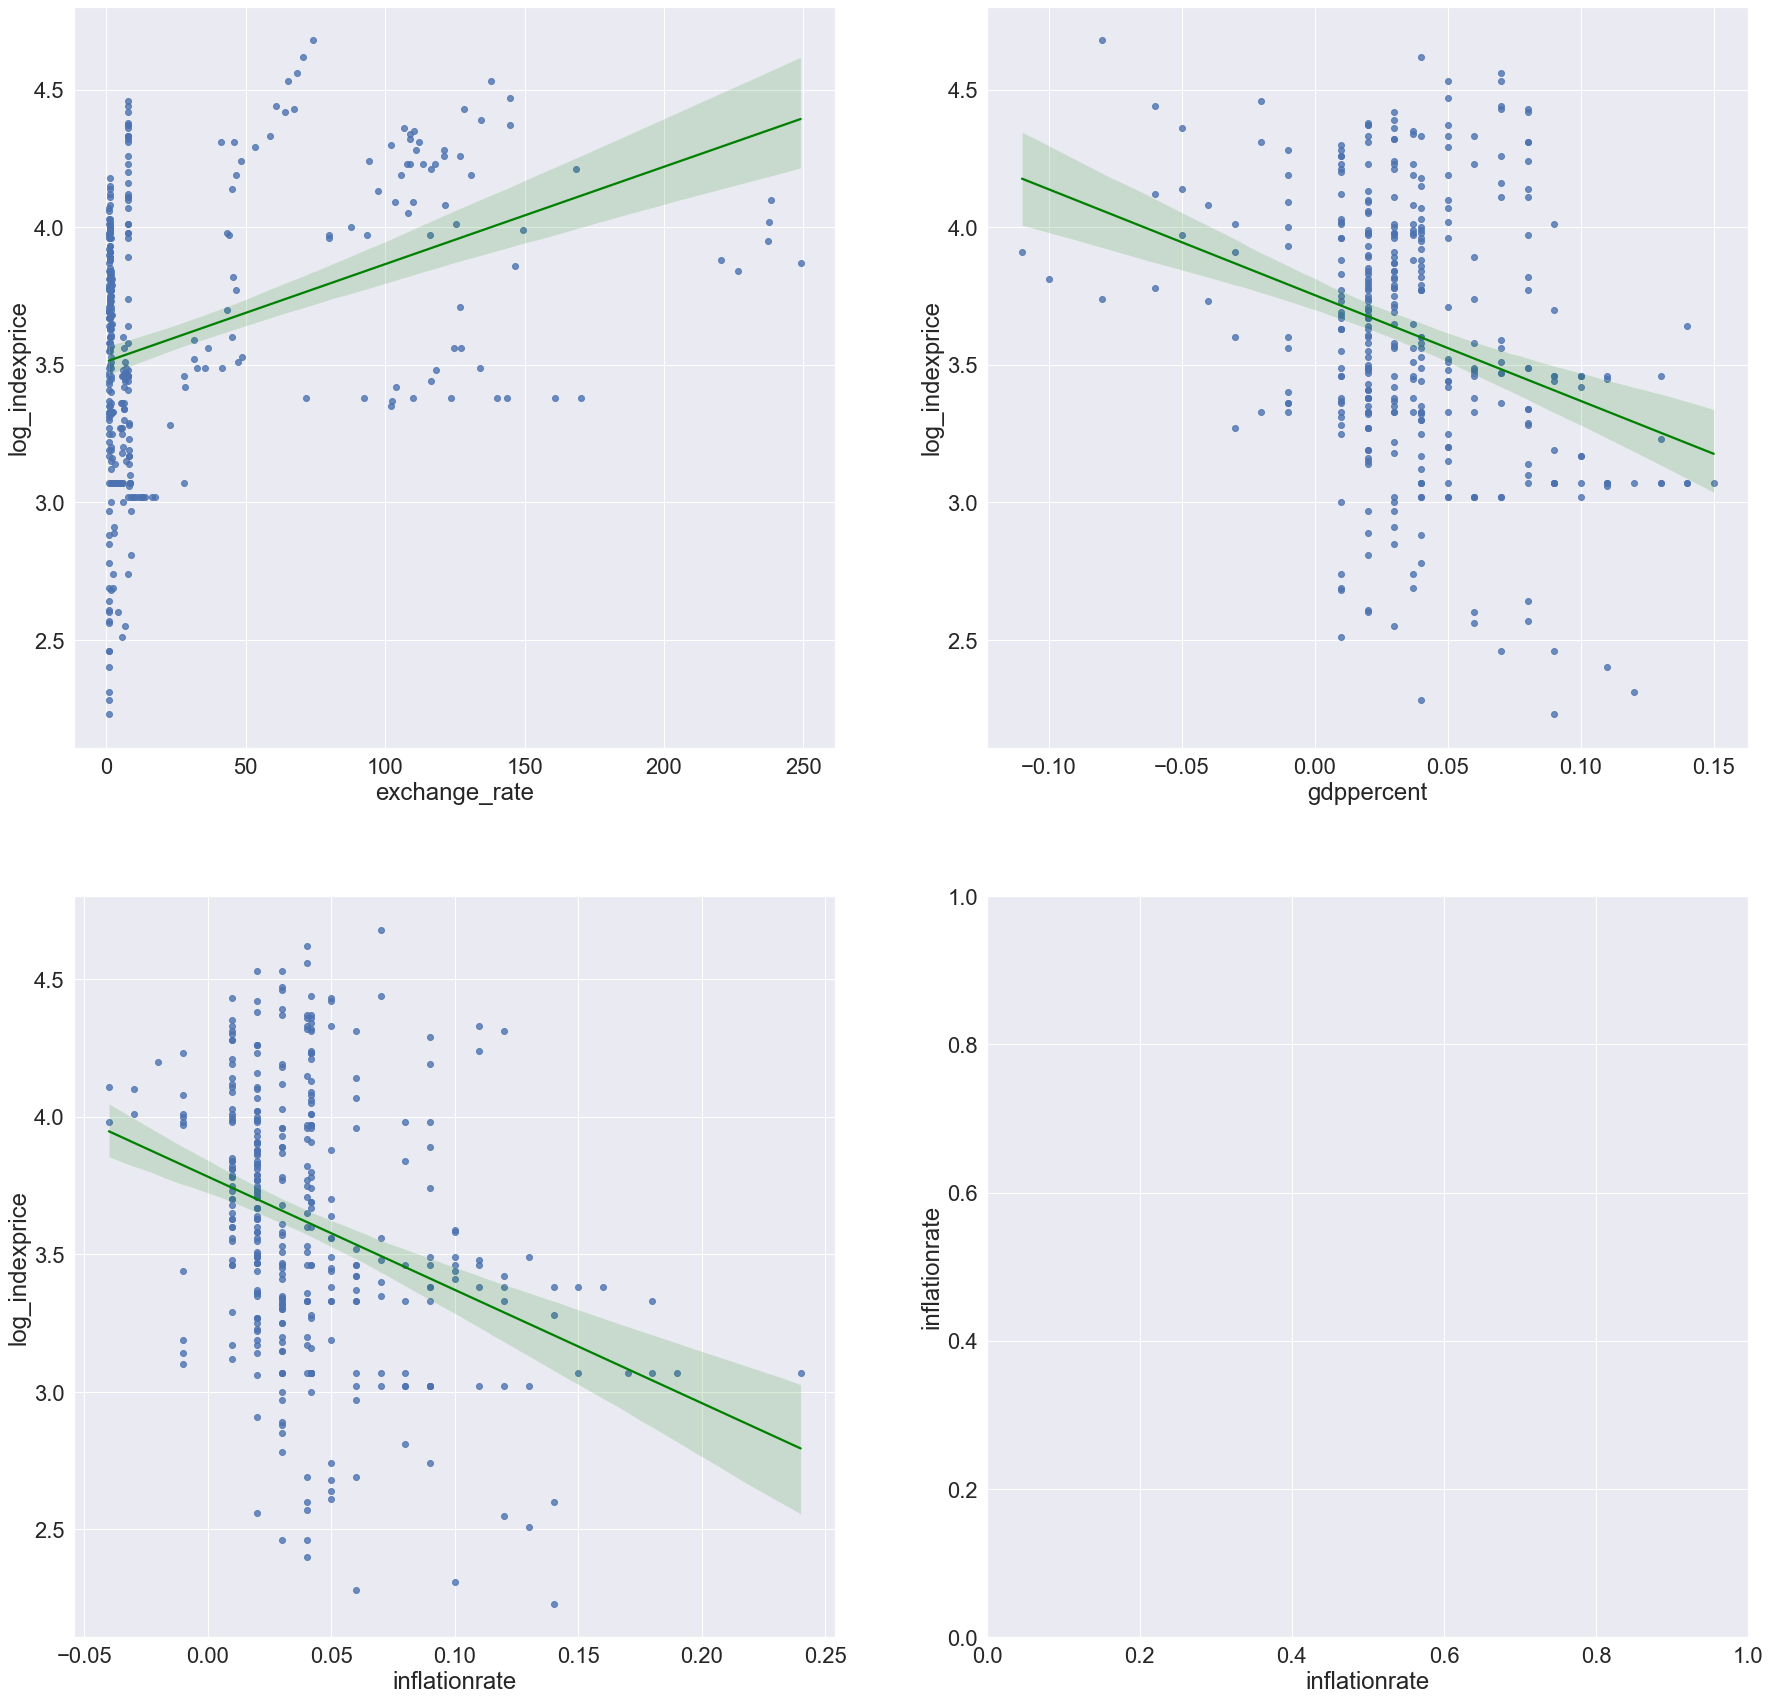

In [143]:
# weak correlation features ( > 0.2 & < 0.4)
weak_corr = corr[(abs(corr) >= 0.2) & (abs(corr) < 0.4)].sort_values(ascending=False).index.tolist()
print('\n Weakly correlated features: ', weak_corr, '\n')

weak_fet = data_matrix.loc[:, weak_corr + ['log_indexprice']]

fig, ax = plt.subplots(2, 2, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(weak_corr):
        sns.regplot(x=weak_corr[i], y='log_indexprice', data=weak_fet, ax=ax, line_kws={'color': 'green'})
        sns.set(font_scale=2)
        plt.ylabel(weak_corr[i], fontsize=24)
        plt.xlabel(weak_corr[i], fontsize=24)


 very Weakly correlated features:  ['tradebalance', 'unemploymentrate', 'manufacturingoutput'] 



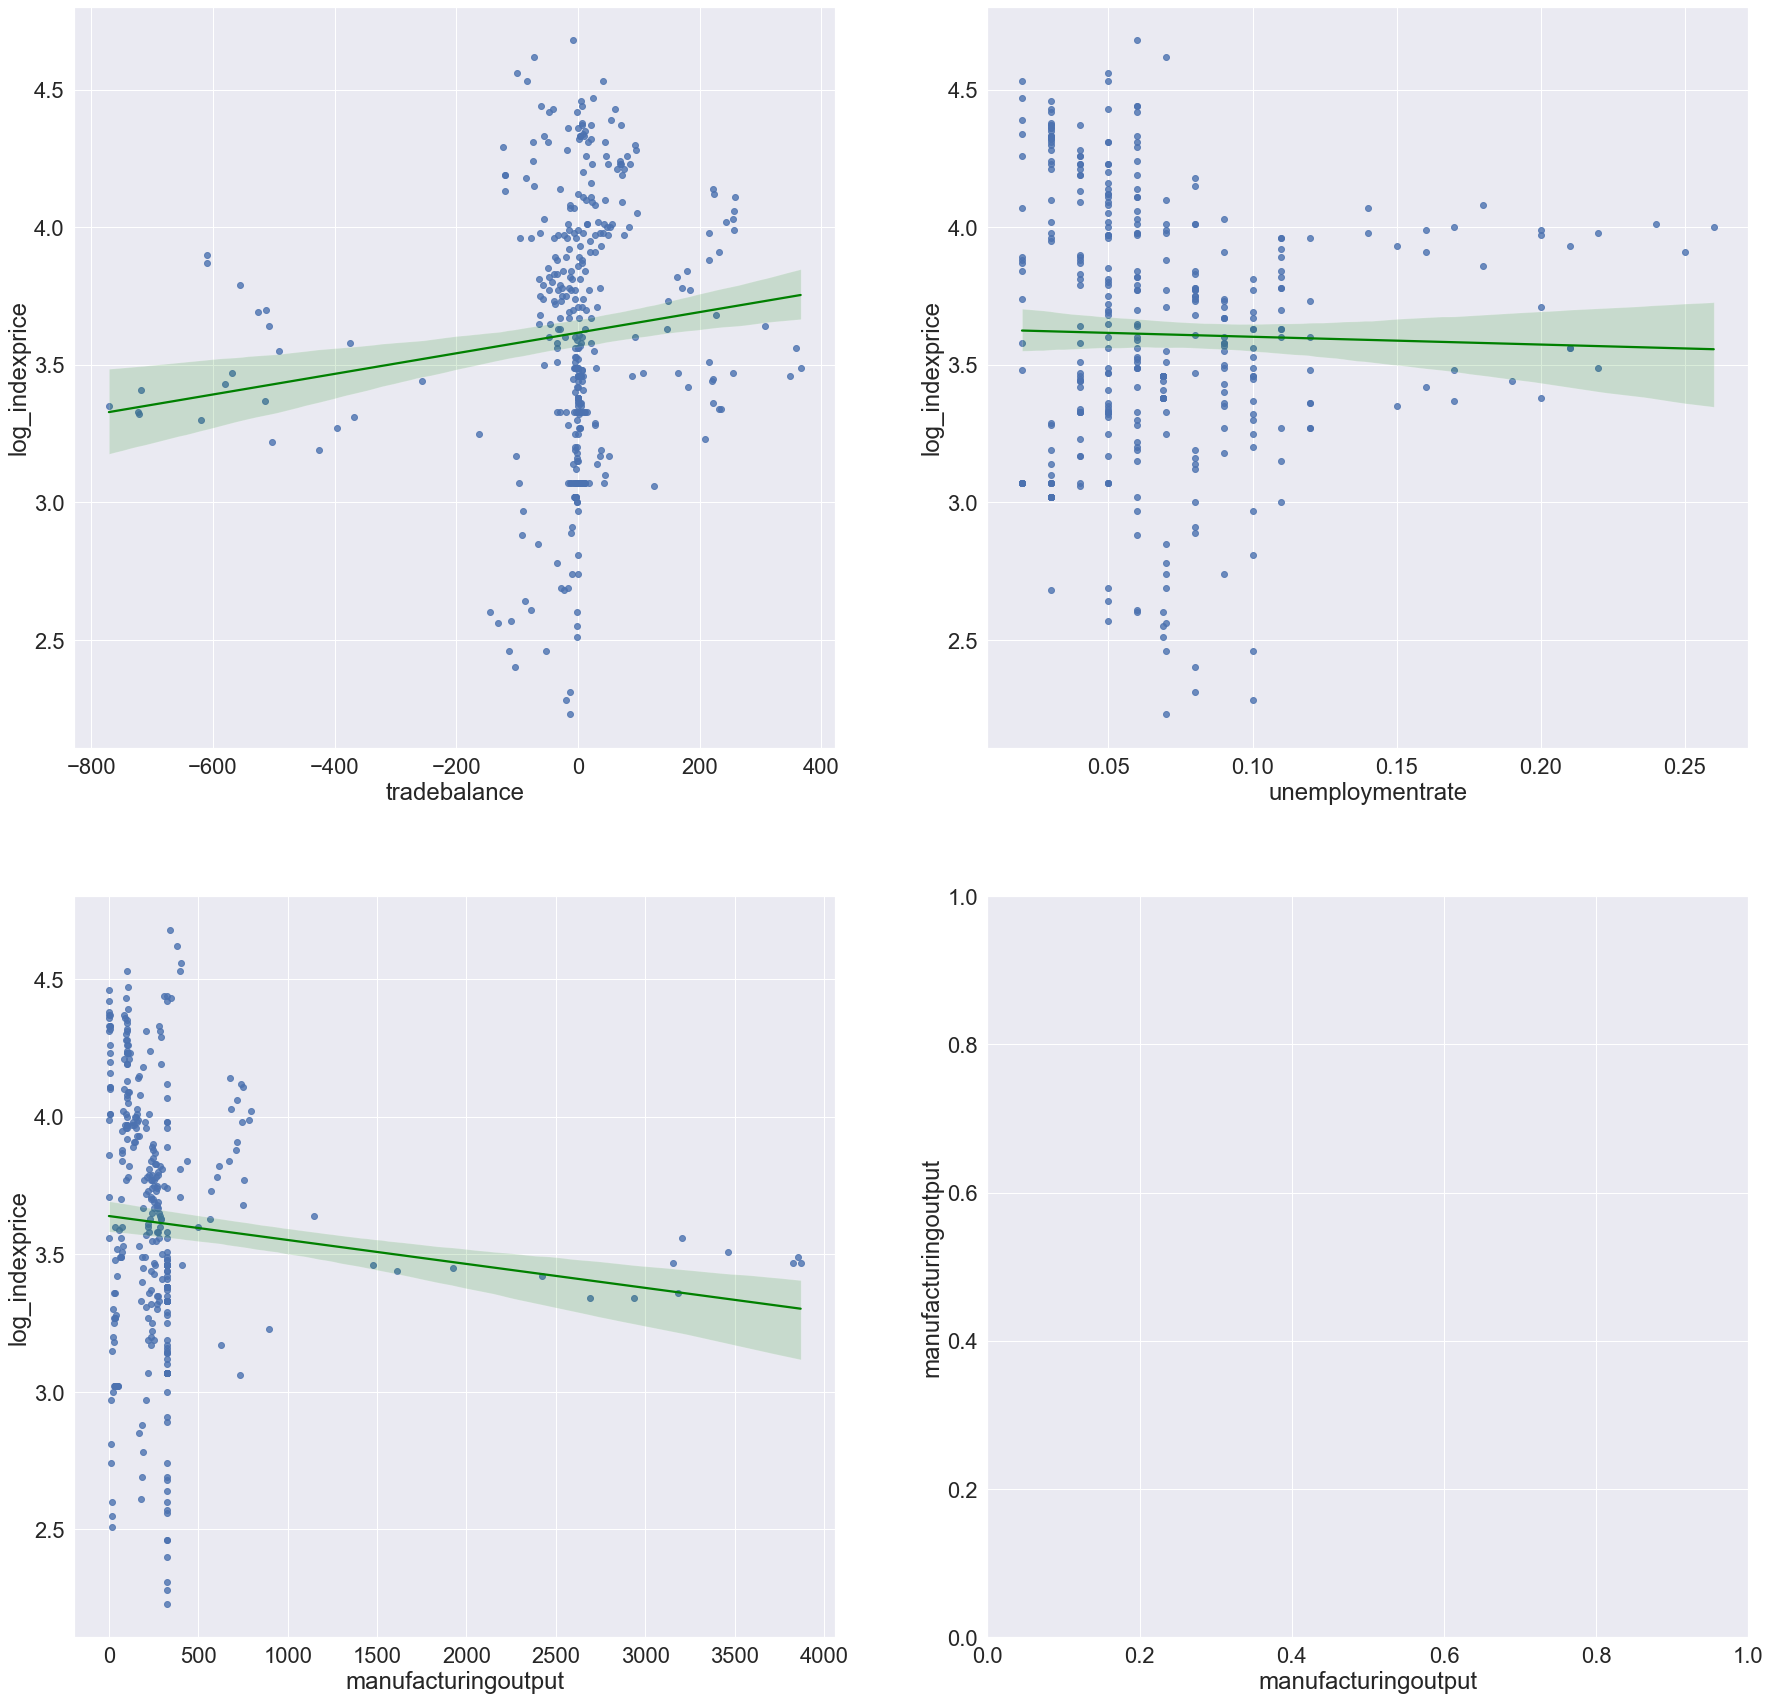

In [144]:

# very weak correlation features ( <0.2)
weak_corr = corr[(abs(corr) < 0.2)].sort_values(ascending=False).index.tolist()
print('\n very Weakly correlated features: ', weak_corr, '\n')

weak_fet = data_matrix.loc[:, weak_corr + ['log_indexprice']]

fig, ax = plt.subplots(2, 2, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(weak_corr):
        sns.regplot(x=weak_corr[i], y='log_indexprice', data=weak_fet, ax=ax, line_kws={'color': 'green'})
        sns.set(font_scale=2)
        plt.ylabel(weak_corr[i], fontsize=24)
        plt.xlabel(weak_corr[i], fontsize=24)

Based on this result, it is known that (tradebalance ,umenplotment, manufacturingoutput )have a low correlation with the price index, so these three variables are removed

<br/>Therefore, we only select these variables as independent variables and the price index as the dependent variable in order to establish a regression model between the price index and each factor

In [154]:
data_lr = data_matrix.drop(['index price','tradebalance','unemploymentrate','manufacturingoutput'],axis=1)
data_lr.head()

,year,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,USTreasury
0,1980.0,2.23,0.14,21.59,1.0,0.09,12575.0,0.11
1,1981.0,2.31,0.10,31.77,1.0,0.12,13976.0,0.14
2,1982.0,2.28,0.06,28.52,1.0,0.04,14434.0,0.13
3,1983.0,2.46,0.03,26.19,1.0,0.09,15544.0,0.11
4,1984.0,2.40,0.04,25.88,1.0,0.11,17121.0,0.12


# 3. Linear Regression

## 3.1 Glance

In [164]:
from sklearn.linear_model import LinearRegression

In [173]:
#model
lrmodel = LinearRegression()

#data array
y = np.array(data_lr['log_indexprice']).reshape(-1,1)
x = np.array(data_lr[['inflationrate','oil prices','exchange_rate','gdppercent','percapitaincome','USTreasury']])

lrmodel.fit(x,y)

LinearRegression()

In [177]:
print(f"coefficients : {lrmodel.coef_} \n intercept : {lrmodel.intercept_}")

coefficients : [[-2.70265486e-01  1.45169056e-03  4.60468781e-03 -7.97107298e-01
   3.06377198e-06 -7.85508843e+00]] 
 intercept : [3.86541552]


So we get the formula is :
<br/> 
y = 2.70265486e-01 x1+ 1.45169056e-03 x2+ 4.60468781e-03 x3 +-7.97107298e-01 x4 +3.06377198e-06 x5 + -7.85508843e+00 x6 +3.86541552

<br/>
x1= 'inflationrate',x2= 'oil prices',x3= 'exchange_rate',x4 = 'gdppercent',x5 = 'percapitaincome',x6 = 'USTreasury'

<AxesSubplot:>

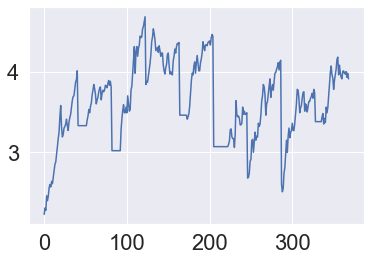

In [178]:
data_lr['log_indexprice'].plot()

## 3.2 Building a Multiple Linear Regression Model

Mainly use the OLS algorithm for target regression

In [183]:
# build model
x2 = sm.add_constant(x)
est = sm.OLS(y,x2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     89.45
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.99e-68
Time:                        20:08:37   Log-Likelihood:                -86.391
No. Observations:                 369   AIC:                             186.8
Df Residuals:                     362   BIC:                             214.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8654      0.076     50.573      0.000       3.715       4.016
x1            -0.2703      0.513     -0.527      0.599      -1.280       0.739
x2             0.0015      0.001      1.765      0.078      -0.000       0.003
x3             0.0046      0.000     13.823      0.000       0.004       0.005
x4            -0.7971      0.502     -1.587      0.113      -1.785       0.190
x5          3.064e-06   1.35e-06      2.278      0.023    4.19e-07    5.71e-06
x6            -7.8551      0.698    -11.258      0.000      -9.227      -6.483
==============================================================================
Omnibus:                       10.182   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                5.705
Skew:                           0.091   Prob(JB):                       0.0577
Kurtosis:                       2.419   Cond. No.                     1.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the returned model overview, it contains the results of F test and t test, where the F statistic value is 89.45, and the corresponding probability value p(1.99e-68) is far less than 0.05, indicating that the null hypothesis should be rejected and the model is considered to be significant Among the t statistics of the respective variables, the probability value p(0.928) corresponding to the x1= 'inflationrate',x2= 'oil prices',x4 = 'gdppercent', variable is greater than 0.05, indicating that the null hypothesis cannot be rejected, and the variable is considered to be insignificant, and it cannot be determined that it is an important factor affecting sales. factor.

For the F test, if the original hypothesis cannot be rejected, the model is considered invalid, and the usual solution is to increase the amount of data, change the independent variable or choose another model; for the t test, if the original hypothesis cannot be rejected, then It is considered that there is no linear relationship between the corresponding independent variable and the dependent variable, and the usual solution is to eliminate the variable or modify the variable (if there is a nonlinear relationship between the dependent variable and the independent variable, select the corresponding mathematical conversion function and correct it deal with). According to the overview information of the returned fit model, since the t-test result of the x1= 'inflationrate',x2= 'oil prices',x4 = 'gdppercent' variables are not significant, the scatter relationship between it and the dependent variable Sales can be explored. than can be removed from the model remove

## 3.3 Model optimization

In [185]:
#data array
y = np.array(data_lr['log_indexprice']).reshape(-1,1)
x = np.array(data_lr[['exchange_rate','percapitaincome','USTreasury']])

x2 = sm.add_constant(x)
est = sm.OLS(y,x2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.27e-70
Time:                        20:11:05   Log-Likelihood:                -88.956
No. Observations:                 369   AIC:                             185.9
Df Residuals:                     365   BIC:                             201.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8870      0.055     70.087      0.000       3.778       3.996
x1             0.0047      0.000     14.098      0.000       0.004       0.005
x2          4.504e-06   1.14e-06      3.955      0.000    2.26e-06    6.74e-06
x3            -8.4698      0.601    -14.092      0.000      -9.652      -7.288
==============================================================================
Omnibus:                        7.016   Durbin-Watson:                   0.217
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.331
Skew:                           0.062   Prob(JB):                        0.115
Kurtosis:                       2.484   Cond. No.                     1.01e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Overview information after fitting the multiple linear regression model After readjusting the model, the new model obtained still passed the significance test, and the coefficients corresponding to each independent variable also passed the significance test. So the final model is:
price index = 3.88 + 0.0047x3= 'exchange_rate'+4e-6 x5 ('percapitaincome')-8.4 x6 '(USTreasury)'

The overview information of the multiple linear regression model is shown in the figure. After excluding the outliers, the model is obtained. Whether it is the significance test of the model or the significance test of the coefficient, the respective probability p values ​​are less than 0.05, indicating that they all pass the significance test.

## 3.4 Predict 

Comparison of actual value and predicted value

In [186]:
#Compute predicted price
data_lr['Predicted_price'] = 3.9 + 0.0047 * data_lr['exchange_rate'] + 4e-6 * data_lr['percapitaincome'] - 8.4 * data_lr['USTreasury']
data_lr.head()

,year,log_indexprice,inflationrate,oil prices,exchange_rate,gdppercent,percapitaincome,USTreasury,Predicted_price
0,1980.0,2.23,0.14,21.59,1.0,0.09,12575.0,0.11,3.031000
1,1981.0,2.31,0.10,31.77,1.0,0.12,13976.0,0.14,2.784604
2,1982.0,2.28,0.06,28.52,1.0,0.04,14434.0,0.13,2.870436
3,1983.0,2.46,0.03,26.19,1.0,0.09,15544.0,0.11,3.042876
4,1984.0,2.40,0.04,25.88,1.0,0.11,17121.0,0.12,2.965184


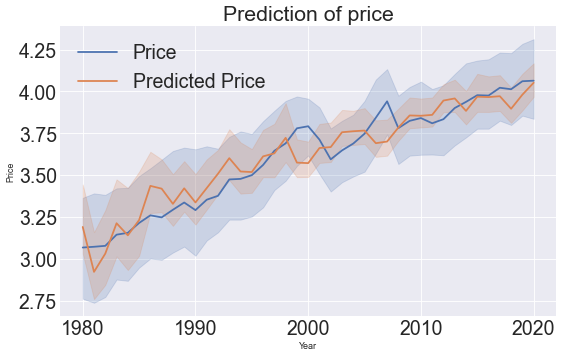

In [194]:
matplotlib.style.use('seaborn-dark')
fig = plt.figure(figsize=(10,6), dpi=64) 
sns.lineplot(data=data_lr, x='year', y='log_indexprice',lw=2, label='Price')  
sns.lineplot(data=data_lr, x='year', y='Predicted_price',lw=2, label='Predicted Price')  
plt.grid()
sns.set(font_scale=2)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.title('Prediction of price')
plt.show()

From the figure above, it can be seen that the fluctuations of the actual value and the predicted value are basically the same, and the model fitting effect is very good.

# 4. Random Forest Regressor

## 4.1 Feature Importance Analysis
Use the feature importance of random forest to sort the importance of features

In [202]:
x_feature = ['inflationrate','oil prices','exchange_rate','gdppercent','percapitaincome','USTreasury']
x_val = data_lr[x_feature]
y_val = data_lr['log_indexprice']

clf=RandomForestRegressor(n_estimators=10,random_state=123,max_depth=4)#Build a Classification Random Forest Regressor
clf.fit(x_val, y_val) #Fitting Independent and Dependent Variables
print(clf.score(x_val, y_val))

for feature in zip(x_feature,clf.feature_importances_):
    print(feature)

0.8775098211429967
('inflationrate', 0.01125707521419329)
('oil prices', 0.016696657229470478)
('exchange_rate', 0.422611548583023)
('gdppercent', 0.004529405117791865)
('percapitaincome', 0.24877854756233703)
('USTreasury', 0.2961267662931843)


The score for the training set is 0.88, giving us a good prediction. We find again the same meaningful variables : exchange_rate, percapitaincome and USTreasury.

(-1.0, 6.0)

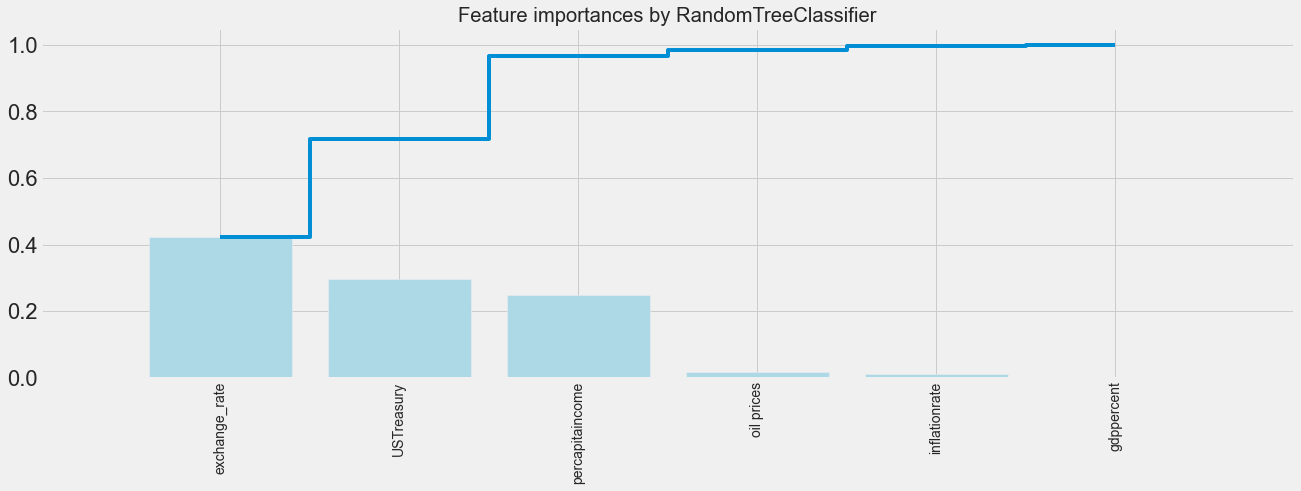

In [199]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

## feature importances visualization
importances = clf.feature_importances_
feat_names = data_lr[x_feature].columns
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")

x = list(range(len(indices)))

plt.bar(x, importances[indices], color='lightblue',  align="center")
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

Most information is brought by the three meaningful variables we kept for the linear regression model. Thus, this model stay coherent with the previous ones.

## 4.2 Decision tree

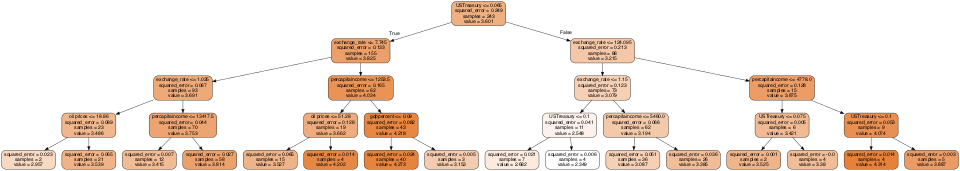

In [212]:
# Sample a single tree from a random forest
estimator = clf.estimators_[5]

dot_data = tree.export_graphviz(estimator, 
                                out_file=None, 
                                feature_names=x_feature,
                                class_names = ['0-normal', '1-fraud'],
                                filled = True,
                                rounded =True)
dot_data=dot_data.replace('\n','')
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"10,10"')
display(Image(graph.create_png()))

Here we can observ the tree model, which has not a lot of useful information as we are using a random forest. Still, we can learn how is build the tree.

# Conclusions

It can be concluded from the above steps that 

<br/> (1) stock price index growth has considerable inertia;
<br/> (2) These variables percapitaincome,oil prices,exchange_rate,tradebalance are positively correlated with the price index;
<br/> (3) These variables unemploymentrate,manufacturingoutput,gdppercent,inflationrate,USTreasury  are negatively correlated with the price index;
<br/> (4) Ranking of the importance of variables affecting stock index price :'exchange_rate'>'USTreasury'>'percapitaincome'>'oil prices'>'inflationrate'>'gdppercent'
<br/> 
<br/> 
<br/> 



In summary, this paper adopts the OLS multiple linear regression model, and finally proves that our proposed model works well

In the trend of rapid development of contemporary international trade, exchange rate has more and more influence on a country's economy. The economy of any country is affected by exchange rate changes to varying degrees, and the degree of impact of exchange rate changes on a country's economy depends on the country's degree of opening to the outside world. influence is also increasing.


Inflation is an important macroeconomic factor affecting stock market prices. The influence of this factor on the trend of the stock market is more complicated. It not only stimulates the stock market, but also depresses the stock market. Inflation is mainly caused by increasing the money supply too much.